In [7]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel

MERCADO DE BIENES: CONSUMO, INVERSIÓN, DETERMINACIÓN DEL PRODUCTO Y LA POLÍTICA FISCAL

-La oferta determina la demanda.
-Keynes: en momentos de crisis, le Estado debe interferir en la economía para salir de crisis. Es decir, la DEMANADA determina la OFERTA.
-Gasto Agregado es todo lo que un país DEMANDA. Por logica debe ser a todo lo que este país PRODUSCA, para llegar a un equilibrio.
-Si algún componente del intercepto cambia, la curva se mueve de manera paralela; pero si algún componente de la pendiente cambia, la pendiente abrirá o cerrará su ángulo.

GRÁFICO

In [8]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [9]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

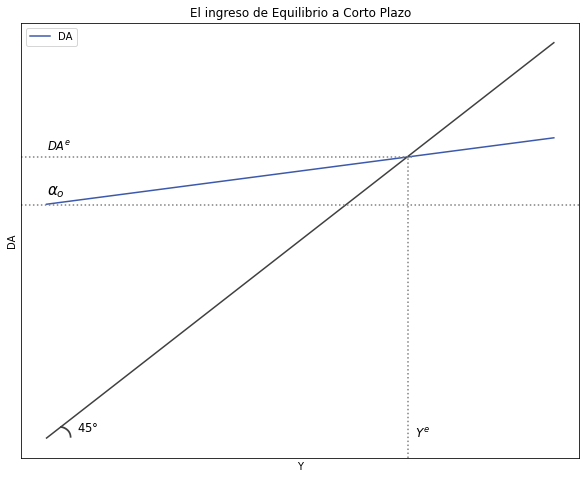

In [10]:
# Gráfico


# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º
#es suficiente hasta ahí---------------------------

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas
plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=146, xmin= 0, xmax= 1, linestyle = ":", color = "grey")
plt.axhline(y=176, xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend()

plt.show()


In [11]:
DA_IS_K

array([146.37, 146.79, 147.21, 147.63, 148.05, 148.47, 148.89, 149.31,
       149.73, 150.15, 150.57, 150.99, 151.41, 151.83, 152.25, 152.67,
       153.09, 153.51, 153.93, 154.35, 154.77, 155.19, 155.61, 156.03,
       156.45, 156.87, 157.29, 157.71, 158.13, 158.55, 158.97, 159.39,
       159.81, 160.23, 160.65, 161.07, 161.49, 161.91, 162.33, 162.75,
       163.17, 163.59, 164.01, 164.43, 164.85, 165.27, 165.69, 166.11,
       166.53, 166.95, 167.37, 167.79, 168.21, 168.63, 169.05, 169.47,
       169.89, 170.31, 170.73, 171.15, 171.57, 171.99, 172.41, 172.83,
       173.25, 173.67, 174.09, 174.51, 174.93, 175.35, 175.77, 176.19,
       176.61, 177.03, 177.45, 177.87, 178.29, 178.71, 179.13, 179.55,
       179.97, 180.39, 180.81, 181.23, 181.65, 182.07, 182.49, 182.91,
       183.33, 183.75, 184.17, 184.59, 185.01, 185.43, 185.85, 186.27,
       186.69, 187.11, 187.53, 187.95])

In [12]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(175.9254807692308, 70.37019230769232)

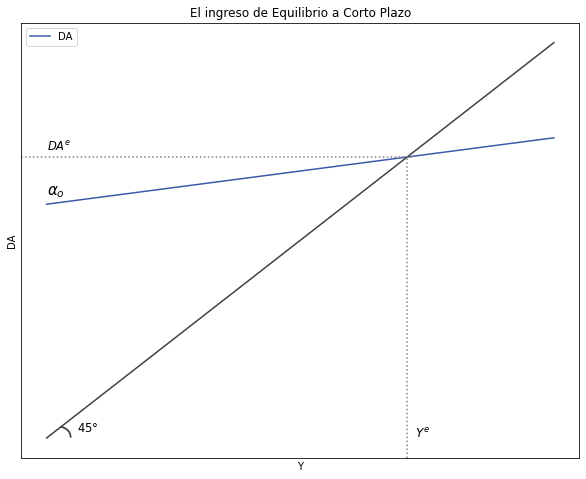

In [13]:
# Gráfico
#gráfico más exacto, NO al ojo

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

ESTÁTICA COMPARATIVA DEL MODELO DE INGRESO-GASTO KEYNESIANO
......
esto es lo que se usa para la 1ra tarea.